# Imports & setup

In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
from models import *
import torch
from torch import nn
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Training

In [ ]:
path_pair_img = '../data/photoshoptest'

image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(root=path_pair_img, transform=image_transform)

In [3]:
batch_size = 5
train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
epochs = 20
torch.cuda.empty_cache()

for i in range(1):
    model = LeNet().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    print("CrossValidation : "+str(i)+"\n-------------------------------\n")
    train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)


    # Create the data loaders for training and validation
    train_dataloader = torch.utils.data.DataLoader(
        train_data,
        batch_size=100,
        shuffle=True
    )

    test_dataloader = torch.utils.data.DataLoader(
        test_data,
        batch_size=100,
        shuffle=False
    )
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model, loss_fn, optimizer)
        #test_basic(test_dataloader, model) # for cross validation
    print("Done!")



CrossValidation : 0
-------------------------------

Epoch 1
-------------------------------
Epoch 2
-------------------------------
Epoch 3
-------------------------------
Epoch 4
-------------------------------
Epoch 5
-------------------------------
Epoch 6
-------------------------------
Epoch 7
-------------------------------
Epoch 8
-------------------------------
Epoch 9
-------------------------------
Epoch 10
-------------------------------
Epoch 11
-------------------------------
Epoch 12
-------------------------------
Epoch 13
-------------------------------
Epoch 14
-------------------------------
Epoch 15
-------------------------------
Epoch 16
-------------------------------
Epoch 17
-------------------------------
Epoch 18
-------------------------------
Epoch 19
-------------------------------
Epoch 20
-------------------------------
Done!


In [5]:
torch.save(model.state_dict(), "./model_todelete")

# Test 

In [2]:
model = LeNet().to(device)
model.load_state_dict(torch.load("./model"))
model.eval()

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=8, bias=True)
)

In [3]:
path_pair_img = '../data/photoshoptest_handmade_test'

image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(root=path_pair_img, transform=image_transform)

test_dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=100,
    shuffle=False
)

In [4]:
y_true, y_score = test_handmade(test_dataloader, model)

In [5]:
performance = get_performance(y_true, y_score)

In [6]:
#output : 
#   [accuracy, 
#   f1, 
#   precision, 
#   recall, 
#   roc_auc, 
#   conf_mat, 
#   fp, 
#   fn, 
#   tp, 
#   tn]
performance

[0.4411764705882353,
 0.4411764705882353,
 0.4411764705882353,
 0.4411764705882353,
 0.82394062879383,
 array([[ 1,  0,  0,  0,  0,  1,  0,  0],
        [ 0,  2,  0,  0,  0,  0,  0,  0],
        [ 4,  0, 18,  0,  0,  0,  0,  0],
        [ 6,  0,  0, 12,  0,  3,  1,  0],
        [ 0,  2,  0,  0, 20,  0,  0,  0],
        [12,  0,  2,  0,  2,  6,  0,  0],
        [ 0,  0,  0,  0, 10,  8,  1,  3],
        [ 1,  0,  0,  0, 10,  9,  2,  0]], dtype=int64),
 array([23,  2,  2,  0, 22, 21,  3,  3], dtype=int64),
 array([ 1,  0,  4, 10,  2, 16, 21, 22], dtype=int64),
 array([ 1,  2, 18, 12, 20,  6,  1,  0], dtype=int64),
 array([111, 132, 112, 114,  92,  93, 111, 111], dtype=int64)]

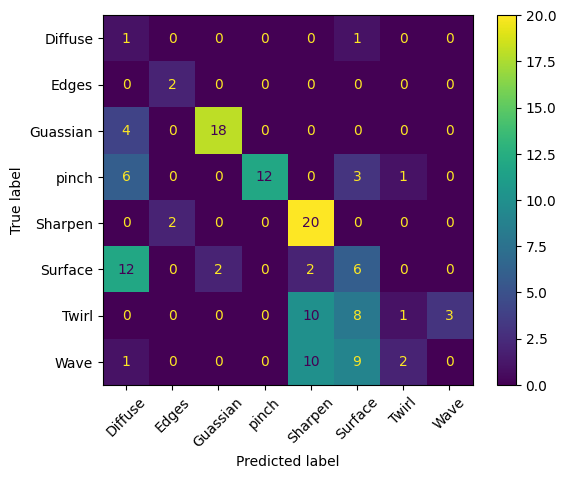

In [7]:
conf_matrix = performance[5]
labels = ["Diffuse", "Edges", "Guassian", "pinch", "Sharpen", "Surface", "Twirl", "Wave"]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = labels)
disp.plot()
plt.xticks(rotation = 45) 
plt.show()